In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [3]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [4]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [5]:
df = pd.read_csv("../creditcardfraud/creditcard.csv")

In [6]:
target = 'Class'

In [7]:
X = df.loc[:, df.columns!=target]

In [8]:
y = df.loc[:, df.columns==target]

In [9]:
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SVMSMOTE


In [17]:
y['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# Import thư viện và module cần thiết
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SVMSMOTE

# Khởi tạo pipeline với SVMSMOTE và LogisticRegression
pipeline = make_pipeline(SVMSMOTE(sampling_strategy=0.005), LogisticRegression(class_weight={0: 0.25, 1: 0.75}))

# Fit pipeline vào dữ liệu
pipeline.fit(X, y)

# Transform dữ liệu
X_resampled, y_resampled = pipeline.named_steps['svmsmote'].fit_resample(X, y)

In [13]:
from collections import Counter

In [18]:
y_resampled['Class'].value_counts()

Class
0    284315
1      1421
Name: count, dtype: int64

<center><h1>Sử dụng dữ liệu đã sinh ra</h1></center>

In [11]:
X_resampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285731,93850.536952,-4.544615,7.235117,-11.717957,7.864797,-7.052214,-3.897977,-11.579547,4.198167,-4.447133,...,0.881800,2.489097,0.603491,1.010487,0.344152,-0.434081,-0.260052,0.239682,0.684151,33.253302
285732,93889.324926,-15.473546,7.669940,-23.455006,7.249336,-13.040675,-5.604211,-14.731775,9.666772,-4.373217,...,-2.118686,3.151130,0.668420,-1.261874,0.459433,-0.030167,0.065003,-3.273225,-1.165118,127.511264
285733,93884.440209,-13.401518,7.732504,-21.560343,7.190891,-11.954002,-5.412674,-14.004380,8.665357,-4.525105,...,-1.588544,3.088590,0.752727,-0.692774,0.438418,-0.165553,-0.005470,-2.668865,-0.808996,111.483087
285734,93860.859083,-11.422728,6.681380,-17.218368,8.476764,-10.543246,-4.218879,-14.303820,7.437924,-3.613894,...,-0.785591,2.546407,0.093052,-1.208660,0.411903,0.155677,-0.005006,-1.619352,-0.511165,82.062235


In [12]:
X_resampled.shape

(285736, 30)

In [13]:
y_resampled.shape

(285736, 1)

In [14]:
y_resampled['Class'].value_counts()

Class
0    284315
1      1421
Name: count, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,random_state=42,
                                                    test_size=0.2,stratify=y_resampled)

<center><h1>Sử dụng bộ tham số tối ưu để huấn luyện mô hình</h1></center>

In [16]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Tạo mô hình Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá mô hình bằng F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Dùng average='weighted' cho bài toán đa lớp
print(f'F1 Score: {f1:.2f}')

# Báo cáo chi tiết
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Nếu bạn muốn lưu mô hình để sử dụng sau này, bạn có thể sử dụng thư viện joblib
import joblib
joblib.dump(clf, 'random_forest_model.pkl')

# Để load lại mô hình đã lưu
# clf = joblib.load('random_forest_model.pkl')


F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.92      0.95       284

    accuracy                           1.00     57148
   macro avg       0.99      0.96      0.98     57148
weighted avg       1.00      1.00      1.00     57148

Confusion Matrix:
[[56859     5]
 [   22   262]]


['random_forest_model.pkl']

In [17]:
generate_model_report(y_test, y_pred)

Accuracy =  0.999527542521173
Precision =  0.9812734082397003
Recall =  0.9225352112676056
F1 Score =  0.9509981851179672


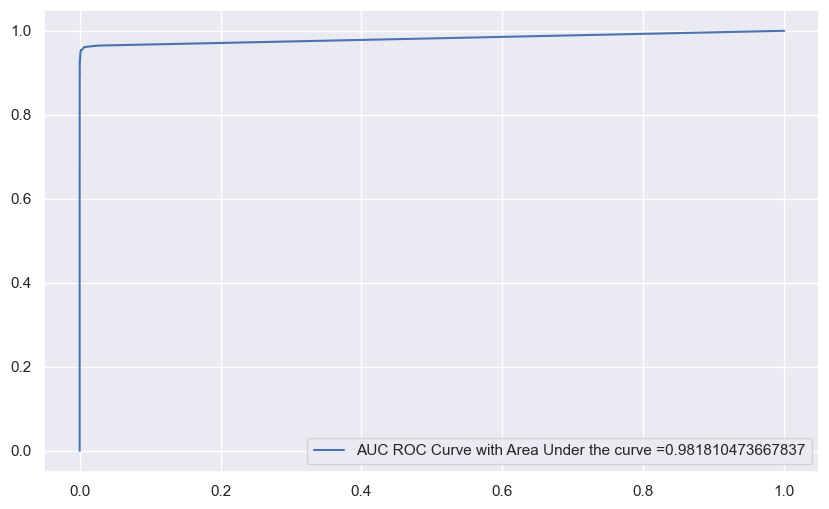

In [18]:
generate_auc_roc_curve(clf, X_test)

In [19]:
from sklearn.metrics import f1_score

In [20]:
#Sử dụng tập dữ liệu test để chạy model dự đoán 
# y_pred = KNN.predict(X_test)

#Kiểm tra độ chính xác của model trên tập dữ liệu test

final_f1_score = f1_score(y_test, y_pred, average='binary')
print("Final F1 Score on training data:", final_f1_score)

Final F1 Score on training data: 0.9509981851179672


In [19]:
#Độ giá trị f1-score của Model trên tập Huấn luyện
y_train_pred = clf.predict(X_train)
f1_train = f1_score(y_train, y_train_pred, average='binary')
# /f1_score(y_train, y_train_pred, average='macro')  # Sử dụng average='macro' cho đa lớp, 'binary' cho nhị phân
print('F1-score trên tập huấn luyện:', round(f1_train*100, 2))

SyntaxError: invalid syntax (3081389168.py, line 4)